In [97]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.linear_model import LinearRegression
plt.style.use('ggplot')

## Purpose

As holy week is close we want to understand if it will be necessary to increase the budget on advertising specifically in Search Engine Marketing Campaigns (SEM) for holafly or remain it and depend on organic growth.
We will study the interest in holafly and eSim search over the assest the task

### Utilities

In [119]:
def creating_tendency(used_data, period_column, key_column):
    transition_data = used_data.set_index(period_column).to_period()
    dp = DeterministicProcess(
        index=transition_data.index,  # dates from the training data
        constant=True,       # dummy feature for the bias (y_intercept)
        order=1,             # the time dummy (trend)
        drop=True,           # drop terms if necessary to avoid collinearity
    )
    # `in_sample` creates features for the dates given in the `index` argument
    X = dp.in_sample()
    
    y = transition_data[key_column]  # the target
    
    # The intercept is the same as the `const` feature from
    # DeterministicProcess. LinearRegression behaves badly with duplicated
    # features, so we need to be sure to exclude it here.
    model = LinearRegression(fit_intercept=False)
    model.fit(X, y)
    
    used_data['tendency'] = np.clip(pd.Series(model.predict(X), index=X.index),0,100).astype('int').values
    used_data['cleaned_growth'] = used_data[key_column]-used_data['tendency']

## Spain

In [148]:
key = 'holafly'
data = pd.read_csv(f'./tmp/ES_behaviour_{key}.csv')
data['date'] = pd.to_datetime(data['date'])

Text(0.5, 0, 'Dates')

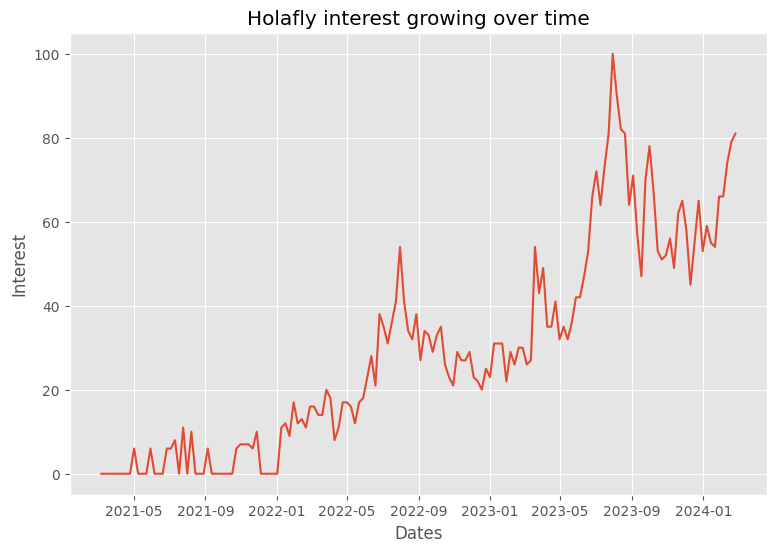

In [149]:
fig, ax = plt.subplots(figsize=(9,6))
sns.lineplot(data=data, x='date', y=key)
ax.set_title('Holafly interest growing over time')
ax.set_ylabel('Interest')
ax.set_xlabel('Dates')

It seem that the tendecy of Holafly interest overtime is growing, let's remove the tendency factor to see if there is a seasonality

Text(0.5, 0, 'Dates')

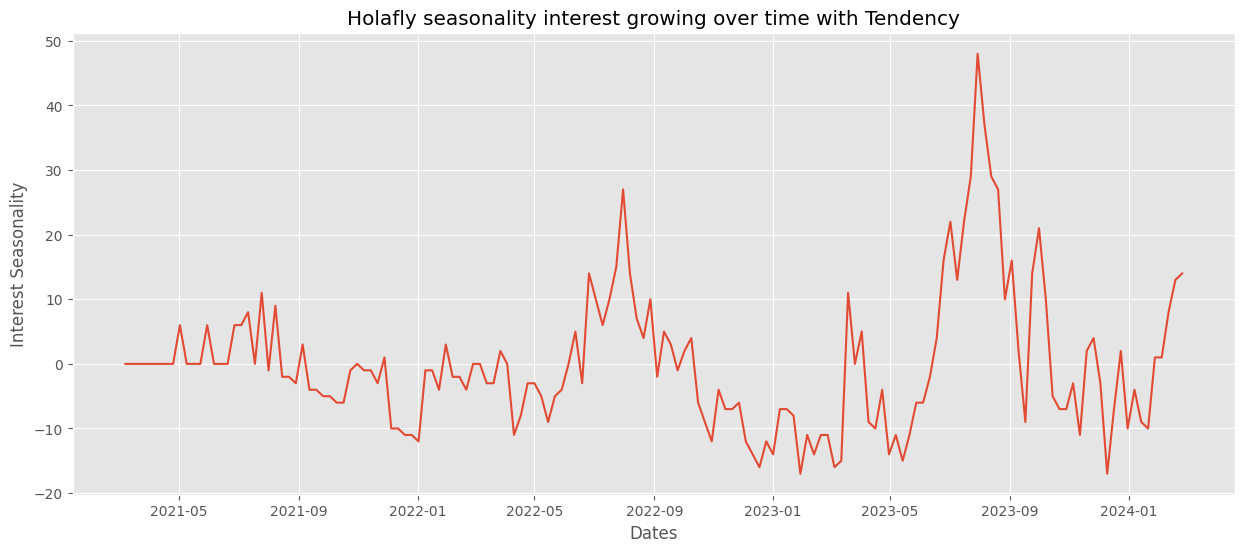

In [151]:
creating_tendency(data, 'date',key)

fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=data, x='date', y='cleaned_growth', ax=ax)
ax.set_title('Holafly seasonality interest growing over time with Tendency')
ax.set_ylabel('Interest Seasonality')
ax.set_xlabel('Dates')

It can be seen that in the months when Holafly charges more interest is between July and September.
However, Easter generally occurs at the end of March or the beginning of April. In 2023, it had a peak of interest, but it has not occurred before, so we cannot expect it to happen again this year.

In [152]:
key = 'eSim'
data = pd.read_csv(f'./tmp/ES_behaviour_{key}.csv')
data['date'] = pd.to_datetime(data['date'])
data = data[data[key] > 0 ]

Text(0.5, 0, 'Dates')

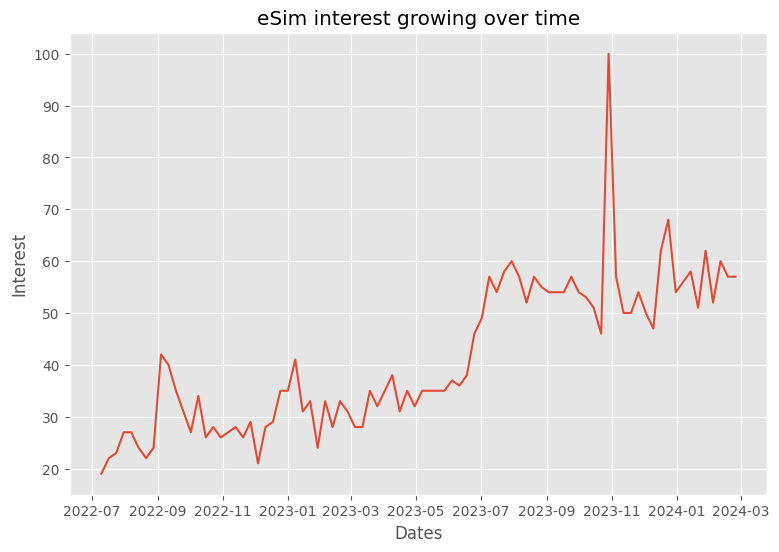

In [153]:
fig, ax = plt.subplots(figsize=(9,6))
sns.lineplot(data=data, x='date', y=key)
ax.set_title('eSim interest growing over time')
ax.set_ylabel('Interest')
ax.set_xlabel('Dates')

Text(0.5, 0, 'Dates')

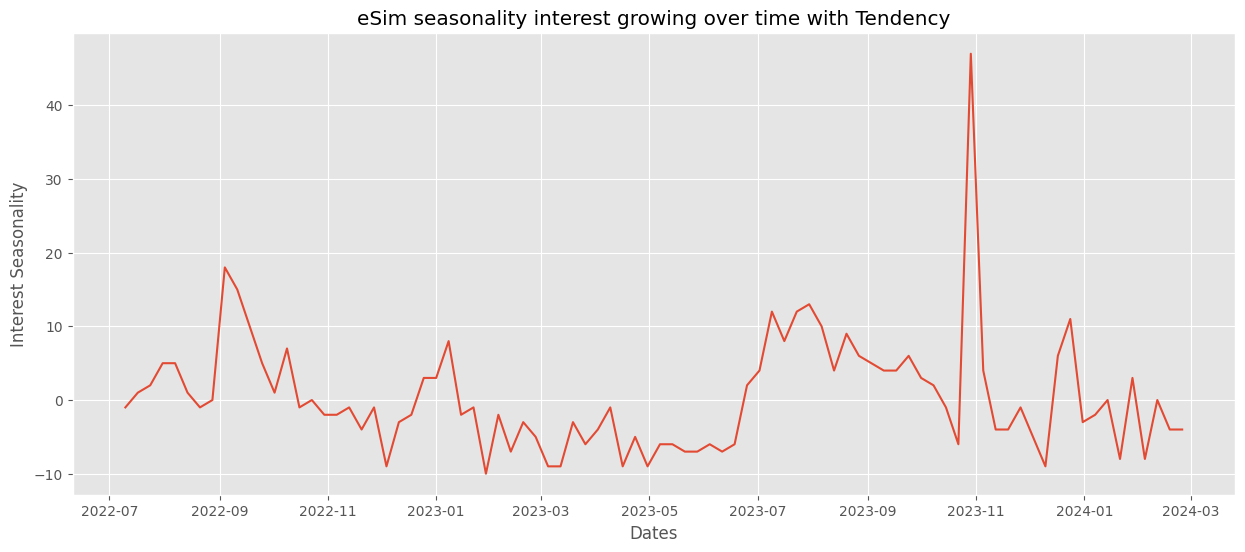

In [154]:
creating_tendency(data, 'date',key)

fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=data, x='date', y='cleaned_growth', ax=ax)
ax.set_title('eSim seasonality interest growing over time with Tendency')
ax.set_ylabel('Interest Seasonality')
ax.set_xlabel('Dates')

In general the seasonality refers that in November and June create picks but not in Holy week

### Conclusions

It is recommended to increase the budget in SEM ads since there is no proof people consider look for solutions like holafly when holy week gets close, this will increase acquisition and maintain interest in the brand.

#### Top Topics that can be used in SEM campaigns

In [138]:
key = 'holafly'
data = pd.read_csv(f'./tmp/ES_top_{key}.csv')
data_topics = data['topic_title'].to_list()
key = 'eSim'
data = pd.read_csv(f'./tmp/ES_top_{key}.csv')
data_topics += data['topic_title'].to_list()
key = 'holafly'
data = pd.read_csv(f'./tmp/ES_rising_{key}.csv')
data_topics += data['topic_title'].to_list()
key = 'eSim'
data = pd.read_csv(f'./tmp/ES_rising_{key}.csv')
data_topics += data['topic_title'].to_list()
pd.DataFrame({'topics': list(set(data_topics))})

,topics
0,Multi SIM
1,Llamada telefónica
2,Movistar
3,Teléfono móvil
4,Samsung
5,Xiaomi
6,Yoigo
7,Andorra
8,Código descuento
9,Itinerancia
